In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.models import load_model
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing import image

In [3]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [4]:
IMG_SIZE =(224,224)
BATCH_SIZE = 32
EPOCHS=10
OUTPUT_SHAPE=3

ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/potato',
                                                             shuffle=True,
                                                             batch_size=BATCH_SIZE,
                                                             image_size=(IMG_SIZE))

Found 2067 files belonging to 3 classes.


In [5]:
print(ds.class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [6]:
def create_data_batch(dataset,train_size = 0.8,test_size=0.1,val_size=0.1,shuffle=True,shuffle_size=1000):
    data_size = len(dataset)

    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=6)

    train_size = int(data_size*train_size)
    val_size = int(data_size*test_size)
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)

    return train_ds,test_ds,val_ds

In [7]:
train_ds,test_ds,val_ds = create_data_batch(ds)

In [8]:
len(train_ds),len(test_ds),len(val_ds)

(52, 7, 6)

In [9]:
class_name = ds.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

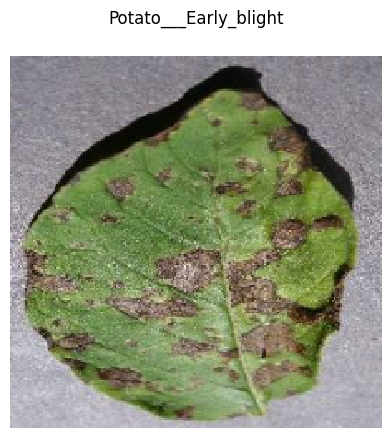

In [11]:
for image,label in ds.take(1):
  for i in range(1):
    plt.matshow(image[i].numpy().astype('uint8'))
    plt.title(class_name[label[i]])
    plt.axis("off")

In [12]:
rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255),
    tf.keras.layers.experimental.preprocessing.Resizing(224,224)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [14]:
INPUT_SHAPE=(BATCH_SIZE,224,224,3)

In [15]:
model = tf.keras.Sequential([

  rescale,
  data_augmentation,
  tf.keras.layers.Conv2D(45,(3,3),activation = "relu",input_shape = (INPUT_SHAPE)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(50,(3,3),activation = "relu"),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(50,(3,3),activation = "relu"),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),

  #DENSE LAYER
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(OUTPUT_SHAPE,activation="softmax")

])
model.build(INPUT_SHAPE)

In [16]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

callback=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=2)

In [17]:
history = model.fit(train_ds,epochs=20,validation_data=val_ds,batch_size=BATCH_SIZE,callbacks=[callback])

Epoch 1/20
52/52 [==============================] - 421s 5s/step - loss: 0.7607 - accuracy: 0.6566 - val_loss: 0.5253 - val_accuracy: 0.8438
Epoch 2/20
52/52 [==============================] - 270s 5s/step - loss: 0.4350 - accuracy: 0.8443 - val_loss: 0.3363 - val_accuracy: 0.8750
Epoch 3/20
52/52 [==============================] - 257s 5s/step - loss: 0.3303 - accuracy: 0.8740 - val_loss: 0.1800 - val_accuracy: 0.9219
Epoch 4/20
52/52 [==============================] - 259s 5s/step - loss: 0.2214 - accuracy: 0.9122 - val_loss: 0.1218 - val_accuracy: 0.9583
Epoch 5/20
52/52 [==============================] - 248s 5s/step - loss: 0.1881 - accuracy: 0.9255 - val_loss: 0.1248 - val_accuracy: 0.9531
Epoch 6/20
52/52 [==============================] - 258s 5s/step - loss: 0.1740 - accuracy: 0.9370 - val_loss: 0.0725 - val_accuracy: 0.9844
Epoch 7/20
52/52 [==============================] - 246s 5s/step - loss: 0.1266 - accuracy: 0.9528 - val_loss: 0.0816 - val_accuracy: 0.9740
Epoch 8/20
52

In [18]:
model.evaluate(test_ds)

7/7 [==============================] - 14s 1s/step - loss: 0.2194 - accuracy: 0.9107


[0.21939900517463684, 0.9107142686843872]

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 45)      1260      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 45)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 50)      20300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 50)       0         
 2D)                                                  

In [20]:
model.save("/content/drive/MyDrive/Agricultural-crops.h5")

In [21]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Agricultural-crops.h5")

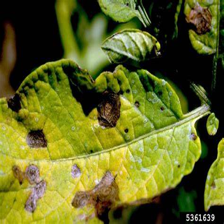

In [24]:
img = Image.open("/content/drive/MyDrive/early blight.jpeg").resize((224,224))
img

In [26]:
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img,axis = 0)

In [28]:
predicted = np.argmax(model.predict(img))
class_name[predicted]

1/1 [==============================] - 0s 91ms/step


'Potato___Early_blight'